## Object detection using REST APIs
- Learn how to use Google Vision REST APIs to detect objects, logos, and landmarks
- Learn how to detect all these properties on video frames
- Reference https://cloud.google.com/vision
## Libraries

- _base64_ for converting images to strings to pass as payloads to REST APIs
- _requests_ to perform REST API calls
- _json_ to work with dictionaries and _requests_
- _numpy_ to translate images to byte arrays
- _matplotlib_ to display images

In [23]:
import base64
import requests
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [24]:
url = "https://rml.azure-api.net/objects/detect"

## Creating base64 Payload

- Read Image in binary format 'rb'
- Convert the file to base64 bytes 
- Convert base64 bytes to base 64 string using decode('utf-8')

In [25]:
with open("Naxos_Taverna.jpg", "rb") as image_file:
    encoded_string = base64.b64encode(image_file.read())
    
headers = {
  "ocpApimTrace": "true",
  "contentType": "application/json",
  "Ocp-Apim-Subscription-Key": "43e0f5260ba64ebbab6da27de6f26016"
}
payload = {
    "imageData": "Yes",
    "content"  : encoded_string.decode('utf-8')
}
response = requests.post(url,data=payload,headers=headers)

## Convert base64 string to image

- Decode base64 string a byte buffer _base64.b64decode_
- Create a 1D numpy array using _np.frombuffer_ **Note** dtype is important
- Decode 1D numpy array to OpenCV image
- Convert color if necessary

In [26]:
image_data = response.json()[0]["payload"]["file"]["value"].replace("data:image/jpeg;base64,","")
imgdata = base64.b64decode(image_data)
q = np.frombuffer(imgdata, dtype=np.float64)
img = cv2.imdecode(q, flags=cv2.IMREAD_COLOR)
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

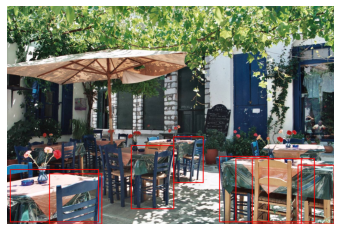

In [27]:
plt.imshow(img)
plt.grid(False)
plt.axis('off')
plt.show()

In [28]:
cap = cv2.VideoCapture('JAMES_BOND_IN_ACTION_007_IN_INDIA.mp4')
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
total_frames = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
fps = cap.get(cv2.CAP_PROP_FPS)

print("Width x Height = %d x %d, Frames = %d, Frames/second = %d\n"%(width,height,total_frames,fps))

Width x Height = 640 x 272, Frames = 5887, Frames/second = 25



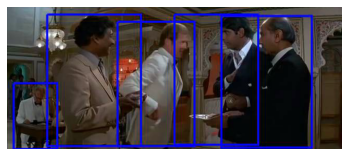

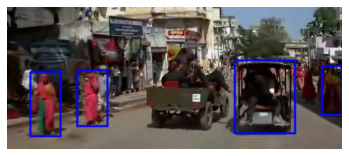

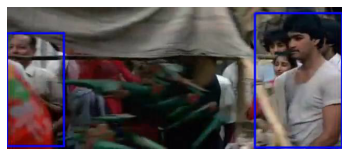

In [29]:
cap = cv2.VideoCapture('JAMES_BOND_IN_ACTION_007_IN_INDIA.mp4')
for i in range(1,total_frames,2000):
    cap.set(cv2.CAP_PROP_POS_FRAMES,i)
    ret,frame = cap.read()
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    # Convert Frame to Base64
    _, im_arr = cv2.imencode('.jpg', frame)  # im_arr: image in Numpy one-dim array format.
    im_bytes = im_arr.tobytes()
    im_b64 = base64.b64encode(im_bytes)
    
    # Build Payload for API
    payload = {
    "imageData": "Yes",
    "content"  : im_b64.decode('utf-8')
    }
    response = requests.post(url,data=payload,headers=headers)
    image_response_data = response.json()[0]["payload"]["file"]["value"].replace("data:image/jpeg;base64,","")
    imgdata_decoded = base64.b64decode(image_response_data)
    q = np.frombuffer(imgdata_decoded,dtype=np.int8)
    video_objects = cv2.imdecode(q, flags=cv2.IMREAD_COLOR)
    plt.imshow(video_objects)
    plt.grid(False)
    plt.axis('off')
    plt.show()